# BSF Project: Price Range Time Series Data
## Daniel You

## Part 1. EDA

### 1.1 Load and Clean up Dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [60]:
# Load .csv file
df = pd.read_csv ('cec_price.csv')

# Change the dollar amounts to integers
for i in range(22):
    df[df.columns[i+1]] = df[df.columns[i+1]].str.replace('$', '')
    df[df.columns[i+1]] = df[df.columns[i+1]].str.replace(',', '').astype('float')

# Dataframe with NaN
df_nan = df[:3]

# Change NaN value to 0
df = df.fillna(0)

df_nan

,Class,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031
0,Car-Compact,45000.0,42000.0,40000.0,38000.0,37000.0,36614.0,36108.0,35603.0,34430.0,...,33348.0,32319.0,31389.0,30548.0,29784.0,29089.0,28455.0,27876.0,27252.0,26645.0
1,Car-Large,128500.0,110000.0,109000.0,100000.0,95000.0,81015.0,81015.0,92035.0,90233.0,...,65438.0,63845.0,62415.0,61129.0,59972.0,58929.0,57989.0,57140.0,56280.0,55432.0
2,Car-Midsize,59000.0,58000.0,57400.0,56000.0,55000.0,55000.0,53000.0,52328.0,51817.0,...,40509.0,39052.0,37749.0,36582.0,35536.0,34597.0,33753.0,32995.0,32218.0,31472.0


In [61]:
df

,Class,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031
0,Car-Compact,45000.0,42000.0,40000.0,38000.0,37000.0,36614.0,36108.0,35603.0,34430.0,...,33348.0,32319.0,31389.0,30548.0,29784.0,29089.0,28455.0,27876.0,27252.0,26645.0
1,Car-Large,128500.0,110000.0,109000.0,100000.0,95000.0,81015.0,81015.0,92035.0,90233.0,...,65438.0,63845.0,62415.0,61129.0,59972.0,58929.0,57989.0,57140.0,56280.0,55432.0
2,Car-Midsize,59000.0,58000.0,57400.0,56000.0,55000.0,55000.0,53000.0,52328.0,51817.0,...,40509.0,39052.0,37749.0,36582.0,35536.0,34597.0,33753.0,32995.0,32218.0,31472.0
3,Car-Sport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110408.0,110985.0,109363.0,107843.0,106212.0,104667.0,103118.0,101818.0,100434.0,99069.0
4,Car-Subcompact,0.0,0.0,0.0,0.0,0.0,34970.0,34832.0,42092.0,40561.0,...,33477.0,32940.0,32441.0,31975.0,31538.0,31126.0,30736.0,30366.0,29921.0,29483.0
5,Cross/Ut-Midsize,0.0,0.0,0.0,0.0,0.0,0.0,79147.0,100816.0,100816.0,...,70582.0,68883.0,67354.0,65977.0,64735.0,63613.0,62599.0,61680.0,60753.0,59839.0
6,Cross/Ut-Small-Car,0.0,0.0,0.0,0.0,0.0,85420.0,83520.0,80910.0,0.0,...,69883.0,68201.0,66688.0,65324.0,64094.0,62984.0,61979.0,61070.0,60151.0,59246.0
7,Cross/Ut-Small-Trk,0.0,0.0,0.0,0.0,0.0,47143.0,0.0,0.0,0.0,...,72120.0,70383.0,68822.0,67415.0,66145.0,64999.0,63962.0,63024.0,62076.0,61142.0
8,Pickup-Compact,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68310.0,67627.0,66951.0,66281.0,65618.0,64962.0,64313.0,63669.0,63033.0,62402.0
9,"Pickup-Heavy(8,500-10,000)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,87500.0,85750.0,84035.0,82354.0,80707.0,79093.0,77511.0,75961.0,74442.0,72953.0


In [62]:
# Get the last price for each categories of cars
a = np.array(list(df['2031'][:3]))
p_33 = np.percentile(a,33.33)
p_66 = np.percentile(a,66.66)

# Crate a new column to determine what categories of Class will be in which bucket
df['cat'] = pd.cut(df['2031'][:3], [0, p_33, p_66, np.inf], labels=['low', 'medium', 'high'])
df_nan['cat'] = pd.cut(df_nan['2031'], [0, p_33, p_66, np.inf], labels=['low', 'medium', 'high'])

### 1.2 Find Each Price Categories' Average Value from 2017 to 2031

In [63]:
# I had to drop 2015 and 2016 because of incomplete data
#df_nan = df_nan.drop(['2015','2016'], axis=1)
grouped_df = df_nan.groupby("cat")
mean_df = grouped_df.mean()
mean_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031
cat,,,,,,,,,,,,,,,,,,,,,
low,45000.0,42000.0,40000.0,38000.0,37000.0,36614.0,36108.0,35603.0,34430.0,35598.0,...,33348.0,32319.0,31389.0,30548.0,29784.0,29089.0,28455.0,27876.0,27252.0,26645.0
medium,59000.0,58000.0,57400.0,56000.0,55000.0,55000.0,53000.0,52328.0,51817.0,47582.0,...,40509.0,39052.0,37749.0,36582.0,35536.0,34597.0,33753.0,32995.0,32218.0,31472.0
high,128500.0,110000.0,109000.0,100000.0,95000.0,81015.0,81015.0,92035.0,90233.0,86539.0,...,65438.0,63845.0,62415.0,61129.0,59972.0,58929.0,57989.0,57140.0,56280.0,55432.0


### 1.3 Plot the Three Classes

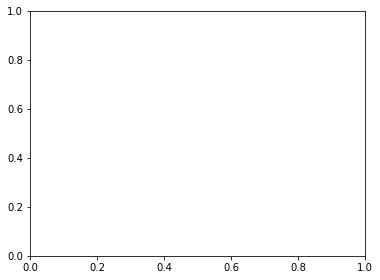

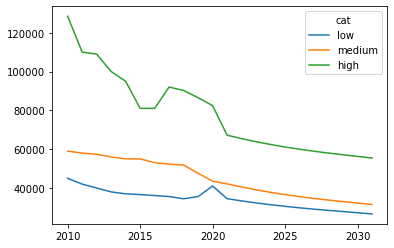

In [64]:
nice = mean_df.T
fig, ax = plt.subplots(figsize=(6, 4.5))
nice.plot()

## 2. Forecast Sales Price for Low, Medium, and High 

### 2.1 ARIMA for Low Sales Price

In [65]:
stepwise_fit = auto_arima(nice['low'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=382.804, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=383.170, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=383.064, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=384.479, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=385.410, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.291 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -189.402
Date:                Fri, 16 Apr 2021   AIC                            382.804
Time:                        16:57:00   BIC                            384.893
Sample:                             0   HQIC                           383.257
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -874.0476    440.991     -1.982      0.047   -1738.373      -9.722
sigma2      3.994e+06   6.73e+05      5.937      0.000    2.68e+06    5.31e+06
===================================================================================
Ljung-Box (Q):                        3.73   Jarque-Bera (JB):                21.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
mod = ARIMA(nice['low'],order=(0,1,0))
results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.low   No. Observations:                   21
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -189.402
Method:                           css   S.D. of innovations           1998.597
Date:                Fri, 16 Apr 2021   AIC                            382.804
Time:                        16:57:13   BIC                            384.893
Sample:                    01-01-2011   HQIC                           383.257
                         - 01-01-2031                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -874.0476    436.130     -2.004      0.045   -1728.846     -19.249


* P-value is statistically significant

In [68]:
n=4
forecast,err,ci = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2032', periods=n, freq='Y'))

In [69]:
df_forecast['lower'] = ci[:,0]
df_forecast['upper'] = ci[:,1]

In [70]:
df_forecast_low = df_forecast['forecast']

In [71]:
df_forecast_low

2032-12-31    25770.952381
2033-12-31    24896.904762
2034-12-31    24022.857143
2035-12-31    23148.809524
Freq: A-DEC, Name: forecast, dtype: float64

### 2.2 ARIMA for Medium Sales Price

In [72]:
stepwise_fit = auto_arima(nice['medium'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=363.311, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=354.313, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=359.811, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=356.190, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=372.941, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=357.932, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.172 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -175.157
Date:                Fri, 16 Apr 2021   AIC                            354.313
Time:                        16:57:28   BIC                            356.402
Sample:                             0   HQIC                           354.767
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1310.8571    425.998     -3.077      0.002   -2145.797    -475.917
sigma2      1.029e+06   3.83e+05      2.688      0.007    2.79e+05    1.78e+06
===================================================================================
Ljung-Box (Q):                       12.90   Jarque-Bera (JB):                21.44
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -1.93
Prob(H) (two-sided):                  0.26   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
mod = ARIMA(nice['medium'],order=(0,1,0))
results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.medium   No. Observations:                   21
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -175.157
Method:                           css   S.D. of innovations           1014.197
Date:                Fri, 16 Apr 2021   AIC                            354.313
Time:                        16:57:30   BIC                            356.402
Sample:                    01-01-2011   HQIC                           354.767
                         - 01-01-2031                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1310.8571    221.316     -5.923      0.000   -1744.628    -877.086


* P-value is statistically significant

In [74]:
# Range of reach forecast can have
n=4
forecast,err,ci = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2032', periods=n, freq='Y'))

# Get the confidence intervals
df_forecast['lower'] = ci[:,0]
df_forecast['upper'] = ci[:,1]

# Forecast value
df_forecast_med = df_forecast['forecast']

df_forecast_med

2032-12-31    30161.142857
2033-12-31    28850.285714
2034-12-31    27539.428571
2035-12-31    26228.571429
Freq: A-DEC, Name: forecast, dtype: float64

### 2.3 ARIMA for High Sales Price

In [75]:
stepwise_fit = auto_arima(nice['high'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=429.296, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=429.965, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=425.723, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=425.797, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=433.831, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=427.809, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=427.391, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=429.340, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=430.184, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.600 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -209.861
Date:                Fri, 16 Apr 2021   AIC                            425.723
Time:                        16:57:34   BIC                            428.857
Sample:                             0   HQIC                           426.403
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2500.1934   1180.082     -2.119      0.034   -4813.112    -187.275
ar.L1         -0.1168      0.136     -0.858      0.391      -0.384       0.150
sigma2      2.762e+07      0.037    7.4e+08      0.000    2.76e+07    2.76e+07
===================================================================================
Ljung-Box (Q):                       13.40   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.86   Prob(JB):                         0.10
Heteroskedasticity (H):               0.03   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.89e+24. Standard errors may be unstable.
"""

In [101]:
mod = ARIMA(nice['high'],order=(1,0,0))
results = mod.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                   high   No. Observations:                   22
Model:                     ARMA(1, 0)   Log Likelihood                -227.657
Method:                       css-mle   S.D. of innovations           7040.298
Date:                Fri, 16 Apr 2021   AIC                            461.314
Time:                        17:00:17   BIC                            464.587
Sample:                    01-01-2010   HQIC                           462.085
                         - 01-01-2031                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.964e+04   2.94e+04      3.045      0.002    3.19e+04    1.47e+05
ar.L1.high     0.9764      0.031     31.381      0.000       0.915       1.037
                                    Roots           

* P-value is statistically significant

In [102]:
# Range of reach forecast can have
n=4
forecast,err,ci = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2032', periods=n, freq='Y'))

# Get the confidence intervals
df_forecast['lower'] = ci[:,0]
df_forecast['upper'] = ci[:,1]

# Forecast value
df_forecast_high = df_forecast['forecast']

df_forecast_high

2032-12-31    56238.079566
2033-12-31    57025.167170
2034-12-31    57793.710279
2035-12-31    58544.145819
Freq: A-DEC, Name: forecast, dtype: float64

## 3. Create a New Dataframe

In [103]:
# Years that will be added on for index
lis = [x for x in range(2032,2036)]

# Forecast in a well structured series
low_new = pd.Series(df_forecast_low.values.tolist(), index=lis)
med_new = pd.Series(df_forecast_med.values.tolist(), index=lis)
high_new = pd.Series(df_forecast_high.values.tolist(), index=lis)

# Concat Series together
df_new = pd.concat([low_new, med_new, high_new], axis=1)

# Rename the columns
df_new = df_new.rename(columns={0: 'low', 1:'medium', 2:'high'})

# Add current the forecast dataframe to original dataframe
frames = [nice,df_new]
result = pd.concat(frames)

result

,low,medium,high
2010,45000.000000,59000.000000,128500.000000
2011,42000.000000,58000.000000,110000.000000
2012,40000.000000,57400.000000,109000.000000
2013,38000.000000,56000.000000,100000.000000
2014,37000.000000,55000.000000,95000.000000
2015,36614.000000,55000.000000,81015.000000
2016,36108.000000,53000.000000,81015.000000
2017,35603.000000,52328.000000,92035.000000
2018,34430.000000,51817.000000,90233.000000
2019,35598.000000,47582.000000,86539.000000


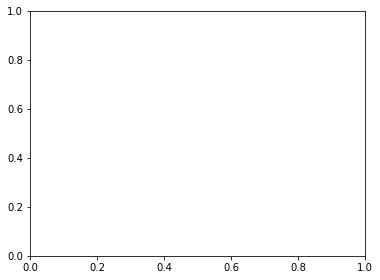

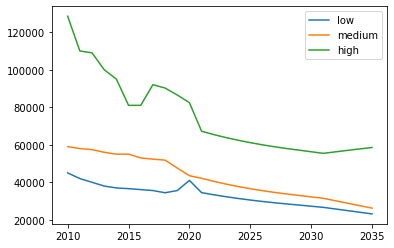

In [104]:
# Plot the new dataframe
fig, ax = plt.subplots(figsize=(6, 4.5))
result.plot()

In [105]:
# Save as a new .csv file
result.to_csv ('cec_price_range.csv', index = True, header=True)